In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, I define the relevant constants:

In [68]:
q=1.602e-19 #These first 2 
m=1.67e-27
Bmag=0.75 #B-field magnitude
Emag=1000000 #E-field magnitude
T=2*np.pi*m/(q*Bmag) #the period of circular motion in the B-field
t=20.2*T #the time that the simulation will run for, just over 20 periods
dt=T/20000 #the size of the timestep
print('the frequency of the E-field oscillation is', 1/T)

the frequency of the E-field oscillation is 11450578.690114504


This next cell oscillates the E-field according to a square wave as described in the paper.

In [3]:
def get_Efield(time,position):
    reduced_time=(time-0.25*T)/(0.5*T)
    if reduced_time/2-np.round(reduced_time/2)<0:
        Efield=np.array([0,Emag,0])
    else:
        Efield=np.array([0,-Emag,0])
    if np.abs(position[1])>0.025:
        Efield=np.array([0,0,0])
    return Efield

This cell simulates the B-field in the cyclotron, and also handles the extractor.

In [4]:
def get_Bfield(position):
    if position[0]<-0.208 and position[1]>=0:
        Bfield=np.array([0,0,0])
    else:
        Bfield=np.array([0,0,Bmag])
    return Bfield

This cell defines the trajectory calculation function. It very similar to what was done on computer HW 7, although this time it uses the Boris integrator instead of euler or runge-kutta.

In [5]:
def calc_trajectory(initial_position, initial_velocity, q=1.602e-19, m=1.67e-27):
    timesteps=np.arange(0,t,dt)
    position_array=np.zeros((np.size(timesteps),3))
    velocity_array=np.zeros((np.size(timesteps),3))
    v=initial_velocity
    x=initial_position
    for inum, step in enumerate(timesteps):
        Efield=get_Efield(inum*dt,x)
        Bfield=get_Bfield(x)
        position_array[inum]=x
        velocity_array[inum]=v
        qprime=dt*q/(2*m)
        h=qprime*Bfield
        s=2*h/(1+h**2)
        u=v+qprime*Efield
        uprime=u+np.cross(u+np.cross(u,h),s)
        v=uprime+qprime*Efield
        x=x+v*dt
    return (position_array,velocity_array)

Here, I simulate the ideal case where the injection velocity is exactly as targeted. I use the resulting trajectory plot as a figure in the paper.

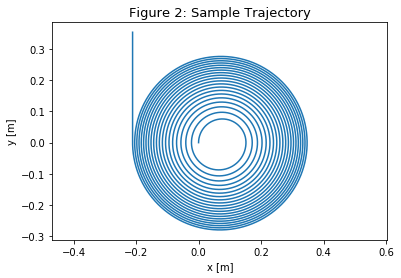

In [18]:
initial_position=np.array([0,0,0])
target_velocity=np.array([0,5000000,0])
target_trajectory=calc_trajectory(initial_position, target_velocity)
position_evoultion_ideal=target_trajectory[0]
x_evolution_ideal=position_evoultion_ideal[:,0]
y_evolution_ideal=position_evoultion_ideal[:,1]
plt.plot(x_evolution_ideal,y_evolution_ideal)
plt.axis('equal')
plt.title('Figure 2: Sample Trajectory', fontsize=13)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.savefig('sample.png', dpi=1000)
plt.show()

These next three cells simulate the trajectories of the 4 particles for each of the three beams. The naming convention for the variables is as follows:

LV,MV,HV = low, middle, high variance

upper/lower signifies if the beam has a larger or smaller injection velocity than the target.


extreme means that the particle is as far above/below the target injection velocity as is allowed, while mid signifies it is in halfway between the target and the corresponding extreme.

In [7]:
LV_upper_mid=calc_trajectory(initial_position, target_velocity*1.00625)
LV_upper_extreme=calc_trajectory(initial_position, target_velocity*1.0125)
LV_lower_mid=calc_trajectory(initial_position, target_velocity*0.99375)
LV_lower_extreme=calc_trajectory(initial_position, target_velocity*0.9875)

In [8]:
MV_upper_mid=calc_trajectory(initial_position, target_velocity*1.0125)
MV_upper_extreme=calc_trajectory(initial_position, target_velocity*1.025)
MV_lower_mid=calc_trajectory(initial_position, target_velocity*0.9875)
MV_lower_extreme=calc_trajectory(initial_position, target_velocity*0.975)

In [9]:
HV_upper_mid=calc_trajectory(initial_position, target_velocity*1.025)
HV_upper_extreme=calc_trajectory(initial_position, target_velocity*1.05)
HV_lower_mid=calc_trajectory(initial_position, target_velocity*0.975)
HV_lower_extreme=calc_trajectory(initial_position, target_velocity*0.95)

These next three cells generate the plots of the beam segments used as figures 4, 5 and 6.

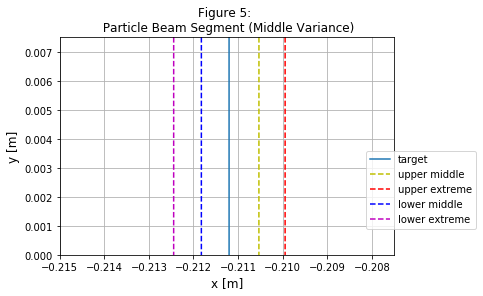

In [77]:
MV_upper_mid_position_evolution=MV_upper_mid[0]
MV_upper_mid_x_evolution=MV_upper_mid_position_evolution[:,0]
MV_upper_mid_y_evolution=MV_upper_mid_position_evolution[:,1]

MV_upper_extreme_position_evolution=MV_upper_extreme[0]
MV_upper_extreme_x_evolution=MV_upper_extreme_position_evolution[:,0]
MV_upper_extreme_y_evolution=MV_upper_extreme_position_evolution[:,1]

MV_lower_mid_position_evolution=MV_lower_mid[0]
MV_lower_mid_x_evolution=MV_lower_mid_position_evolution[:,0]
MV_lower_mid_y_evolution=MV_lower_mid_position_evolution[:,1]

MV_lower_extreme_position_evolution=MV_lower_extreme[0]
MV_lower_extreme_x_evolution=MV_lower_extreme_position_evolution[:,0]
MV_lower_extreme_y_evolution=MV_lower_extreme_position_evolution[:,1]

plt.plot(x_evolution_ideal,y_evolution_ideal)
plt.plot(MV_upper_mid_x_evolution,MV_upper_mid_y_evolution, 'y--')
plt.plot(MV_upper_extreme_x_evolution,MV_upper_extreme_y_evolution, 'r--')
plt.plot(MV_lower_mid_x_evolution,MV_lower_mid_y_evolution, 'b--')
plt.plot(MV_lower_extreme_x_evolution,MV_lower_extreme_y_evolution, 'm--')
plt.plot(np.arange(0.03,0.13,0.01),-0.2785*np.ones(10), 'k--')
plt.xlim(-0.215,-0.2075)
plt.ylim(0,0.0075)
plt.title('Figure 5: \n Particle Beam Segment (Middle Variance)')
plt.ylabel('y [m]', fontsize=12)
plt.xlabel('x [m]', fontsize=12)
plt.legend(['target','upper middle','upper extreme','lower middle','lower extreme'], loc='center left', bbox_to_anchor=(0.9, 0.3))
plt.grid()
plt.savefig('Figure5', dpi=1000, bbox_inches='tight')
plt.show()

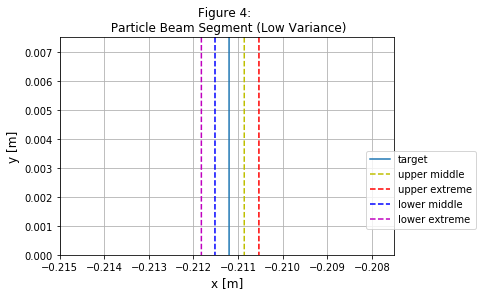

In [78]:
LV_upper_mid_position_evolution=LV_upper_mid[0]
LV_upper_mid_x_evolution=LV_upper_mid_position_evolution[:,0]
LV_upper_mid_y_evolution=LV_upper_mid_position_evolution[:,1]

LV_upper_extreme_position_evolution=LV_upper_extreme[0]
LV_upper_extreme_x_evolution=LV_upper_extreme_position_evolution[:,0]
LV_upper_extreme_y_evolution=LV_upper_extreme_position_evolution[:,1]

LV_lower_mid_position_evolution=LV_lower_mid[0]
LV_lower_mid_x_evolution=LV_lower_mid_position_evolution[:,0]
LV_lower_mid_y_evolution=LV_lower_mid_position_evolution[:,1]

LV_lower_extreme_position_evolution=LV_lower_extreme[0]
LV_lower_extreme_x_evolution=LV_lower_extreme_position_evolution[:,0]
LV_lower_extreme_y_evolution=LV_lower_extreme_position_evolution[:,1]

plt.plot(x_evolution_ideal,y_evolution_ideal)
plt.plot(LV_upper_mid_x_evolution,LV_upper_mid_y_evolution, 'y--')
plt.plot(LV_upper_extreme_x_evolution,LV_upper_extreme_y_evolution, 'r--')
plt.plot(LV_lower_mid_x_evolution,LV_lower_mid_y_evolution, 'b--')
plt.plot(LV_lower_extreme_x_evolution,LV_lower_extreme_y_evolution, 'm--')
plt.plot(np.arange(0.03,0.13,0.01),-0.2785*np.ones(10), 'k--')
plt.xlim(-0.215,-0.2075)
plt.ylim(0,0.0075)
plt.title('Figure 4: \n Particle Beam Segment (Low Variance)')
plt.ylabel('y [m]', fontsize=12)
plt.xlabel('x [m]', fontsize=12)
plt.legend(['target','upper middle','upper extreme','lower middle','lower extreme'], loc='center left', bbox_to_anchor=(0.9, 0.3))
plt.grid()
plt.savefig('Figure4', dpi=1000, bbox_inches='tight')
plt.show()

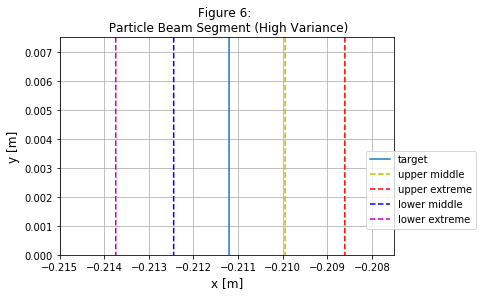

In [79]:
HV_upper_mid_position_evolution=HV_upper_mid[0]
HV_upper_mid_x_evolution=HV_upper_mid_position_evolution[:,0]
HV_upper_mid_y_evolution=HV_upper_mid_position_evolution[:,1]

HV_upper_extreme_position_evolution=HV_upper_extreme[0]
HV_upper_extreme_x_evolution=HV_upper_extreme_position_evolution[:,0]
HV_upper_extreme_y_evolution=HV_upper_extreme_position_evolution[:,1]

HV_lower_mid_position_evolution=HV_lower_mid[0]
HV_lower_mid_x_evolution=HV_lower_mid_position_evolution[:,0]
HV_lower_mid_y_evolution=HV_lower_mid_position_evolution[:,1]

HV_lower_extreme_position_evolution=HV_lower_extreme[0]
HV_lower_extreme_x_evolution=HV_lower_extreme_position_evolution[:,0]
HV_lower_extreme_y_evolution=HV_lower_extreme_position_evolution[:,1]

plt.plot(x_evolution_ideal,y_evolution_ideal)
plt.plot(HV_upper_mid_x_evolution,HV_upper_mid_y_evolution, 'y--')
plt.plot(HV_upper_extreme_x_evolution,HV_upper_extreme_y_evolution, 'r--')
plt.plot(HV_lower_mid_x_evolution,HV_lower_mid_y_evolution, 'b--')
plt.plot(HV_lower_extreme_x_evolution,HV_lower_extreme_y_evolution, 'm--')
plt.plot(np.arange(0.03,0.13,0.01),-0.2785*np.ones(10), 'k--')
plt.xlim(-0.215,-0.2075)
plt.ylim(0,0.0075)
plt.title('Figure 6: \n Particle Beam Segment (High Variance)')
plt.ylabel('y [m]', fontsize=12)
plt.xlabel('x [m]', fontsize=12)
plt.legend(['target','upper middle','upper extreme','lower middle','lower extreme'], loc='center left', bbox_to_anchor=(0.9, 0.3))
plt.grid()
plt.savefig('Figure6', dpi=1000, bbox_inches='tight')
plt.show()

These next two cells extract the information about the beam widths and plot them versus the variances in figure 7.

In [61]:
LV_beamwidth=LV_upper_extreme_x_evolution[-1]-LV_lower_extreme_x_evolution[-1]
MV_beamwidth=MV_upper_extreme_x_evolution[-1]-MV_lower_extreme_x_evolution[-1]
HV_beamwidth=HV_upper_extreme_x_evolution[-1]-HV_lower_extreme_x_evolution[-1]
print(LV_beamwidth)
print(MV_beamwidth)
print(HV_beamwidth)
print('From low variance to mid variance, the beam width increased by a factor of',MV_beamwidth/LV_beamwidth)
print('From mid variance to high variance, the beam width increased by a factor of',HV_beamwidth/MV_beamwidth)
print('From low to high variance, the beam width increased by a factor of',HV_beamwidth/LV_beamwidth)

0.0013386641868208815
0.0024810202472041187
0.005201642077968721
From low variance to mid variance, the beam width increased by a factor of 1.8533552115830891
From mid variance to high variance, the beam width increased by a factor of 2.0965738122574744
From low to high variance, the beam width increased by a factor of 3.8856960014160156


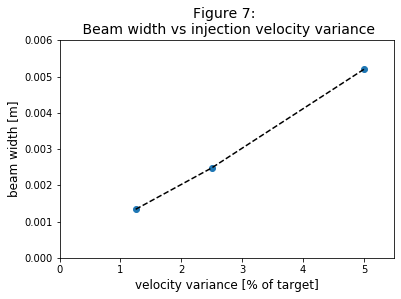

In [63]:
variance=np.array([1.25,2.5,5])
beamwidths=np.array([LV_beamwidth,MV_beamwidth,HV_beamwidth])
plt.plot(variance,beamwidths, 'o')
plt.plot(variance,beamwidths, 'k--')
plt.xlim(0,5.5)
plt.ylim(0,0.006)
plt.title('Figure 7: \n Beam width vs injection velocity variance', fontsize=14)
plt.xlabel('velocity variance [% of target]', fontsize=12)
plt.ylabel('beam width [m]', fontsize=12)
plt.savefig('Figure7.png')
plt.show()

Finally, this cell generates a plot where the horizontal shift effect is easy to see. On the trajectories I simulated before, it was a little hard to pick out, so I wanted a figure that made the effect extra clear.

In [37]:
t=10*T
illustration_trajectory=calc_trajectory(initial_position, target_velocity)
illustration_trajectory2=calc_trajectory(initial_position, target_velocity*1.15)

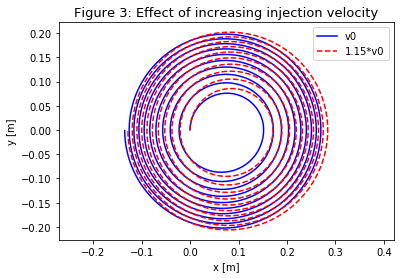

In [45]:
illustration_trajectory_position_evolution=illustration_trajectory[0]
illustration_trajectory_x_evolution=illustration_trajectory_position_evolution[:,0]
illustration_trajectory_y_evolution=illustration_trajectory_position_evolution[:,1]

illustration_trajectory2_position_evolution=illustration_trajectory2[0]
illustration_trajectory2_x_evolution=illustration_trajectory2_position_evolution[:,0]
illustration_trajectory2_y_evolution=illustration_trajectory2_position_evolution[:,1]

plt.plot(illustration_trajectory_x_evolution,illustration_trajectory_y_evolution, 'b')
plt.plot(illustration_trajectory2_x_evolution,illustration_trajectory2_y_evolution, 'r--')
plt.plot
plt.axis('equal')
plt.title('Figure 3: Effect of increasing injection velocity', fontsize=13)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(['v0','1.15*v0'], loc='upper right')
plt.savefig('Figure3.png', dpi=1000)
plt.show()

In [ ]:
)